In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X_temp = iris.data
y_temp = iris.target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X , y = X_temp[: ,[0,1]] , y_temp

X_train , X_test, y_train , y_test = train_test_split(X, y ,
                                                      test_size = 0.25 ,
                                                     random_state = 33)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
import numpy as np

print('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(
np.average(X_train) , np.std(X_train)
) )
print('Test set mean:{:.2f} and std deviation:{:.2f}'.format(
np.average(X_test) , np.std(X_test) ) )

Training set mean:0.00 and standard deviation:1.00
Test set mean:0.13 and std deviation:0.71


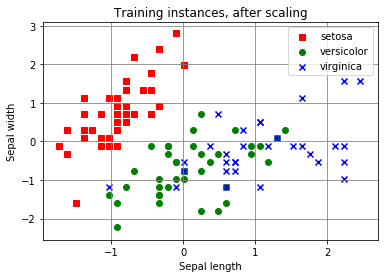

In [4]:
import matplotlib.pyplot as plt

colour_mk = [ ['red' , 's'] , ['green' , 'o'] , ['blue' , 'x'] ]
plt.figure('Training data')

for i in range(len(colour_mk)):
    xs = X_train[: , 0][y_train == i]
    ys = X_train[: , 1][y_train == i]
    plt.scatter( xs , ys , c = colour_mk[i][0] , marker= colour_mk[i][1])
    
    
plt.style.use('default')
plt.grid(c = 'grey')


plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [5]:
import copy

y_train_setosa = copy.copy(y_train)
y_train_setosa[y_train_setosa >0] = 1

y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa >0] = 1



In [6]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss ='log' , 
                                random_state= 42)

In [7]:
clf.fit(X_train , y_train_setosa)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [8]:
clf.coef_

array([[ 21.76180378, -10.51985219]])

In [9]:
clf.intercept_

array([13.90763026])

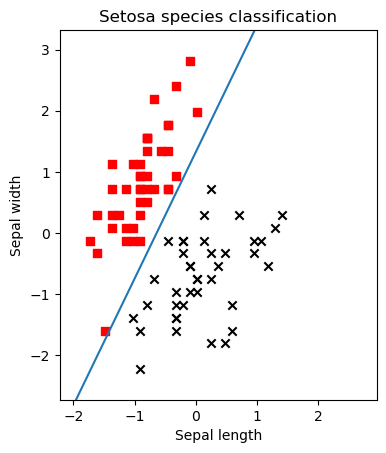

In [12]:
x_min , x_max = X_train[:, 0].min() -.5 , X_train[:, 0].max() +.5
    
y_min , y_max =   X_train[:, 1].min() -.5 , X_train[:, 1].max() +.5  
    
xs = np.arange(x_min , x_max , 0.5)

fig , axes = plt.subplots()

axes.set_aspect('equal')
axes.set_title('Setosa species classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min , x_max)
axes.set_ylim(y_min, y_max)

plt.sca(axes)

plt.scatter(X_train[: , 0][y_train == 0] ,
           X_train[: , 1][y_train==0] , 
           c = 'red' ,  marker= 's')

plt.scatter(X_train[:,0][y_train == 1] , 
           X_train[: , 1][y_train==1],
            c='black', marker='x'
           )

ys = (-clf.intercept_[0] - xs*clf.coef_[0,0])/clf.coef_[0,1]

plt.plot(xs , ys)

plt.show()

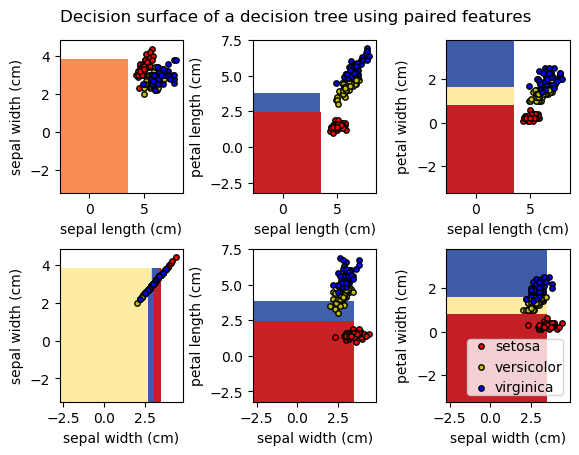

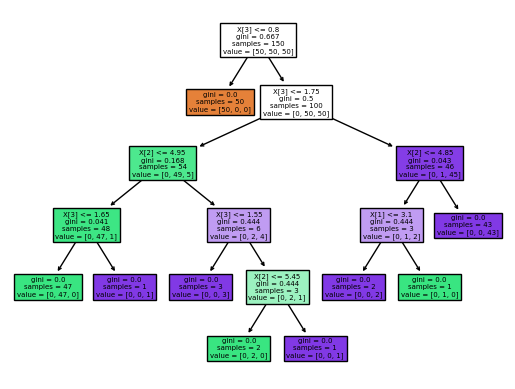

In [15]:
from sklearn.tree import DecisionTreeClassifier , plot_tree


n_classes = 3
plot_colors = "ryb"
plot_step= 0.02

for pairidx , pair in enumerate([[0,1],[0,2],[0,3],[1,1],[1,2],[1,3]]):
    X = iris.data[: , pair]
    y = iris.target
    
    clf = DecisionTreeClassifier().fit(X,y)
    
    plt.subplot(2 , 3 , pairidx + 1)
    
    x_min , x_max = X_train[: , 0].min() -1 , X_train[: , 0].max() +1
    y_min , y_max = X_train[: , 1].min() -1 , X_train[: , 1].max() +1
    
    xx , yy = np.meshgrid(np.arange(x_min , x_max , plot_step),
                         np.arange(y_min , y_max , plot_step))
    plt.tight_layout(h_pad=0.5 , w_pad=0.5 , pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel() , yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,  yy , Z,  cmap  = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i , color in zip(range(n_classes) , plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx , 0], X[idx , 1] , c = color , label = iris.target_names[i],cmap= plt.cm.RdYlBu, edgecolor='black', s=15)
        
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()       